In [67]:
%matplotlib inline

import numpy as np
import pandas as pd
import csv
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler  

from sklearn.metrics import mean_squared_error


In [68]:
df = pd.read_csv("Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [69]:
print(df.isnull().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [70]:
scaler = StandardScaler()  
scaler.fit(df)  
X = scaler.transform(df)

In [71]:
X = df.iloc[:,1:-1]
Y = df.iloc[:,-1]

                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.835977           0.668976  0.612831   
TOEFL Score         0.835977     1.000000           0.695590  0.657981   
University Rating   0.668976     0.695590           1.000000  0.734523   
SOP                 0.612831     0.657981           0.734523  1.000000   
LOR                 0.557555     0.567721           0.660123  0.729593   
CGPA                0.833060     0.828417           0.746479  0.718144   
Research            0.580391     0.489858           0.447783  0.444029   
Chance of Admit     0.802610     0.791594           0.711250  0.675732   

                       LOR       CGPA  Research  Chance of Admit   
GRE Score          0.557555  0.833060  0.580391          0.802610  
TOEFL Score        0.567721  0.828417  0.489858          0.791594  
University Rating  0.660123  0.746479  0.447783          0.711250  
SOP                0.729593  0.718144  0.444029          0.67

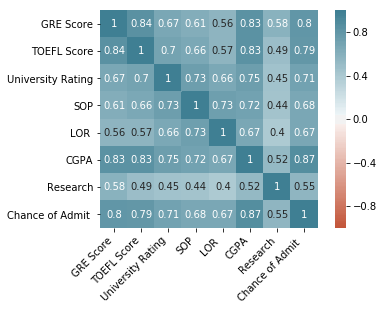

In [95]:
corr = df.iloc[:,1:].corr()
print(corr)
ax = sns.heatmap(
    corr, annot=True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [73]:
X=X.drop(['TOEFL Score'],axis=1)

In [92]:
train_x, test_x, train_y, test_y = train_test_split(X, Y)

In [93]:
lr = LinearRegression().fit(train_x, train_y)
pred = lr.predict(test_x)
MSE=mean_squared_error(test_y,pred)
print(MSE)

0.002932901426079248


In [94]:
rfr = RandomForestRegressor().fit(train_x, train_y)
pred = rfr.predict(test_x)
MSE=mean_squared_error(test_y,pred)
print(MSE)

0.00496385


# Testing on personal data

In [101]:
l = []
for c in X.columns:
    a = input("Enter "+c+": ")
    l.append(a)
    
nl = [l]
print(nl)
ndf = pd.DataFrame(nl,columns = ["GRE Score","University Rating","SOP","LOR","CGPA","Research"])
print(ndf)

# scaler = StandardScaler()  
# scaler.fit(ndf)  
# ndf1 = scaler.transform(ndf)

y_pred = lr.predict(ndf)
print("Chances of admission: ", y_pred*100,"%")

Enter GRE Score: 329
Enter University Rating: 3
Enter SOP: 4
Enter LOR : 5
Enter CGPA: 8.86
Enter Research: 1
[['329', '3', '4', '5', '8.86', '1']]
  GRE Score University Rating SOP LOR  CGPA Research
0       329                 3   4   5  8.86        1
[0.83381139]
